In [1]:
!python -m pip install -e . >> /dev/null

In [2]:
import toolviper
import xradio
import pathlib
import numba
import calviper

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from xradio import measurement_set as ms

In [3]:
if not pathlib.Path.cwd().joinpath("data/gaincaltest2.ps.zarr").exists():
    toolviper.utils.data.download("gaincal.test.zarr", "data")

In [4]:
ps = ms.open_processing_set("data/gaincaltest2.ps.zarr")

sub_ps = ps.sel(intents="CALIBRATE_DELAY#ON_SOURCE", scan_number=2)
sub_ps.summary()

,name,intents,shape,polarization,scan_number,spw_name,field_name,source_name,line_name,field_coords,start_frequency,end_frequency
1,gaincaltest2_0,"[CALIBRATE_DELAY#ON_SOURCE, CALIBRATE_PHASE#ON...","(957, 45, 8, 4)","[XX, XY, YX, YY]","[2, 4, 6, 9, 11, 14, 16, 18, 21, 23, 26]",X0000000000#ALMA_RB_03#BB_1#SW-01#FULL_RES_0,[J2255-3500_0],[J2255-3500_0],[],"[icrs, 22h55m57.68s, -35d00m00.00s]",8.607155e+10,8.629030e+10
0,gaincaltest2_2,"[CALIBRATE_DELAY#ON_SOURCE, CALIBRATE_PHASE#ON...","(957, 45, 8, 4)","[XX, XY, YX, YY]","[2, 4, 6, 9, 11, 14, 16, 18, 21, 23, 26]",X0000000000#ALMA_RB_03#BB_2#SW-01#FULL_RES_1,[J2255-3500_0],[J2255-3500_0],[],"[icrs, 22h55m57.68s, -35d00m00.00s]",8.794655e+10,8.816530e+10
3,gaincaltest2_4,"[CALIBRATE_DELAY#ON_SOURCE, CALIBRATE_PHASE#ON...","(957, 45, 8, 4)","[XX, XY, YX, YY]","[2, 4, 6, 9, 11, 14, 16, 18, 21, 23, 26]",X0000000000#ALMA_RB_03#BB_3#SW-01#FULL_RES_2,[J2255-3500_0],[J2255-3500_0],[],"[icrs, 22h55m57.68s, -35d00m00.00s]",9.632156e+10,9.654030e+10
2,gaincaltest2_6,"[CALIBRATE_DELAY#ON_SOURCE, CALIBRATE_PHASE#ON...","(957, 45, 8, 4)","[XX, XY, YX, YY]","[2, 4, 6, 9, 11, 14, 16, 18, 21, 23, 26]",X0000000000#ALMA_RB_03#BB_4#SW-01#FULL_RES_3,[J2255-3500_0],[J2255-3500_0],[],"[icrs, 22h55m57.68s, -35d00m00.00s]",9.819656e+10,9.841530e+10


In [5]:
dataset = sub_ps["gaincaltest2_0"]

In [6]:
V = dataset.VISIBILITY.mean(dim="time").data.compute()

In [7]:
s = dataset.VISIBILITY.shape
s

(957, 45, 8, 4)

In [8]:
cm = calviper.factory.jones.CalibrationMatrix()

In [9]:
G = cm.create_jones("gain").empty_like(dataset)

[2025-02-07 12:08:25,827]     INFO    viperlog:  Module path: /home/mystletainn/Development/calviper/src/calviper 


In [10]:
G.gain.empty()

In [11]:
G

<xarray.Dataset> Size: 14MB
Dimensions:       (time: 957, antenna: 9, frequency: 8, polarization: 2,
                   scan_id: 957, baseline_id: 45, p: 2, q: 2)
Coordinates:
  * time          (time) float64 8kB 1.503e+09 1.503e+09 ... 1.503e+09 1.503e+09
  * antenna       (antenna) <U9 324B 'DA41_A110' 'DA42_A123' ... 'DA49_A127'
  * frequency     (frequency) float64 64B 8.607e+10 8.61e+10 ... 8.629e+10
  * polarization  (polarization) <U1 8B 'X' 'Y'
  * scan_id       (scan_id) int64 8kB 2 2 2 2 2 2 2 2 ... 26 26 26 26 26 26 26
  * baseline_id   (baseline_id) int64 360B 0 1 2 3 4 5 6 ... 39 40 41 42 43 44
Dimensions without coordinates: p, q
Data variables:
    PARAMETER     (time, antenna, frequency, polarization) float64 1MB nan .....
    WEIGHT        (time, antenna, frequency, polarization) float64 1MB 0.0 .....
    FLAG          (time, antenna, frequency, polarization) float64 1MB 0.0 .....
    MATRIX        (time, baseline_id, frequency, p, q) complex64 11MB (1+0j) ...
Attributes:
    calibration_type:  gain
    observation_info:  {'observer': ['lknee'], 'project': 'uid://A002/X1f841f...

In [12]:
G.PARAMETER.shape

(957, 9, 8, 2)

In [13]:
G.coords.items()

ItemsView(Coordinates:
  * time          (time) float64 8kB 1.503e+09 1.503e+09 ... 1.503e+09 1.503e+09
  * antenna       (antenna) <U9 324B 'DA41_A110' 'DA42_A123' ... 'DA49_A127'
  * frequency     (frequency) float64 64B 8.607e+10 8.61e+10 ... 8.629e+10
  * polarization  (polarization) <U1 8B 'X' 'Y'
  * scan_id       (scan_id) int64 8kB 2 2 2 2 2 2 2 2 ... 26 26 26 26 26 26 26
  * baseline_id   (baseline_id) int64 360B 0 1 2 3 4 5 6 ... 39 40 41 42 43 44)

In [14]:
# This should all be done within the equivalent of VisEquation
#v = V[:, 0, 0]
#v = V

#index_a, ant = calviper.math.tools.encode(dataset.baseline_antenna1_name.to_numpy())
#index_b, _ = calviper.math.tools.encode(dataset.baseline_antenna2_name.to_numpy())

#v_ = calviper.math.tools.build_visibility_matrix(array=v, index_a=index_a, index_b=index_b)

In [15]:
v = V

full_antenna_list = np.union1d(
    dataset.baseline_antenna1_name.to_numpy(),
    dataset.baseline_antenna2_name.to_numpy()
)

full_antenna_list

encoder, antennas = calviper.math.tools.encode(full_antenna_list)

index_a = encoder.transform(dataset.baseline_antenna1_name.to_numpy())
index_b = encoder.transform(dataset.baseline_antenna2_name.to_numpy())

v_ = calviper.math.tools.build_visibility_matrix(array=v, index_a=index_a, index_b=index_b)

In [16]:
v_.shape

(8, 4, 10, 10)

In [17]:
solver = calviper.math.solver.least_squares.LeastSquaresSolver()

In [18]:
gain_solutions = solver.solve(
    vis=v_,
    iterations=50,
    optimizer=calviper.math.optimizer.MeanSquaredError(alpha=0.25),
    stopping=1e-4
)

[2025-02-07 12:08:28,993]     INFO    viperlog:  iteration: 0	loss: 3.851602077484131 
[2025-02-07 12:08:28,995]     INFO    viperlog:  iteration: 5	loss: 0.010313255712389946 
[2025-02-07 12:08:28,996]     INFO    viperlog:  iteration: 10	loss: 0.0034813820384442806 
[2025-02-07 12:08:28,997]     INFO    viperlog:  iteration: 15	loss: 0.0034759799018502235 
[2025-02-07 12:08:29,000]     INFO    viperlog:  iteration: 20	loss: 0.0034757850226014853 
[2025-02-07 12:08:29,002]     INFO    viperlog:  iteration: 25	loss: 0.003475750330835581 
[2025-02-07 12:08:29,004]     INFO    viperlog:  iteration: 30	loss: 0.003475742880254984 
[2025-02-07 12:08:29,006]     INFO    viperlog:  iteration: 35	loss: 0.0034757456742227077 
[2025-02-07 12:08:29,007]     INFO    viperlog:  iteration: 40	loss: 0.0034757573157548904 
[2025-02-07 12:08:29,009]     INFO    viperlog:  iteration: 45	loss: 0.003475775709375739 


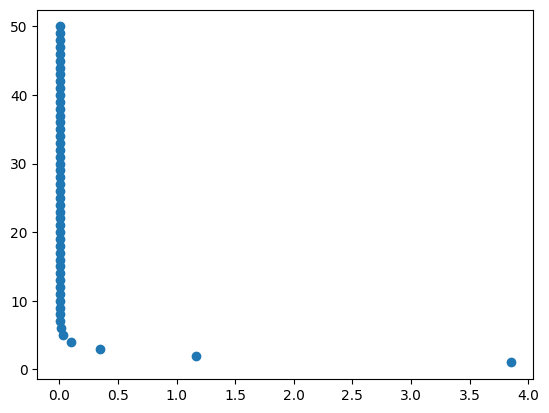

In [19]:
t = np.linspace(1, len(solver.losses), len(solver.losses))

plt.scatter(solver.losses, t)

In [20]:
# Gain solutions

#solver.parameter

In [21]:
solver.parameter.shape

(8, 4, 10)

In [22]:
parameter = solver.parameter

In [26]:
@numba.njit
def to_baseline(array):
    baseline = 0
    n_frequency, n_polarization, n_antenna = array.shape
    
    n_baseline = int(n_antenna*(n_antenna - 1)*0.5)
    print(n_antenna)
    
    n_array = np.zeros((n_baseline, n_frequency, n_polarization), dtype=np.complex64)

    for ant1 in range(n_antenna):
        for ant2 in range(ant1, n_antenna):
            for frequency in range(n_frequency):
                for polarization in range(n_polarization):
                    n_array[baseline, frequency, polarization] = array[frequency, polarization, ant1]*array[frequency, polarization, ant2]

            baseline += 1

    return n_array

In [27]:
converted = to_baseline(parameter)

10


In [25]:
converted.shape

(55, 8, 4)